In [1]:
import struct
import numpy as np

In [2]:
# def read_idx(filename):
#     #CREDIT --- https://gist.github.com/tylerneylon
#     with open(filename,'rb') as f:
#         zero, data_type , dims = struct.unpack('>HBB',f.read(4))
#         shape = tuple

In [3]:
from keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
len(y_train)

60000

In [8]:
len(y_test)

10000

# YOU CAN SEE THE SHAE OF THE IMAGE , IT IS CLEAR THAT THESE ARE GRAY SCALE IMAGE

## SO WE NEED TO RESHAPE THESE IMAGE

In [9]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

## y_train has shape (60000,) needs to be converted in (60000,1)

In [12]:
y_train.shape

(60000,)

In [13]:
y_test.shape

(10000,)

# LETS VISUALIZE THESE IMAGES

In [14]:
import matplotlib.pyplot as plt

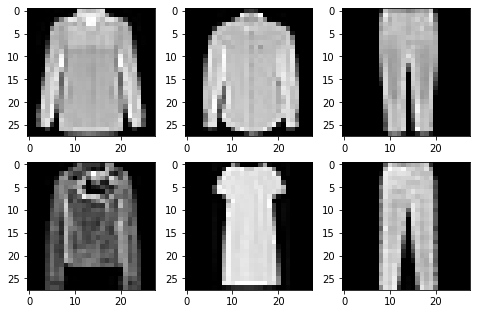

In [22]:
plt.figure(figsize=(8,8))

plt.subplot(331)
n = np.random.randint(0, len(x_train)+1)
plt.imshow(x_train[n], cmap=plt.get_cmap('gray'))


plt.subplot(332)
n = np.random.randint(0, len(x_train)+1)
plt.imshow(x_train[n], cmap=plt.get_cmap('gray'))

plt.subplot(333)
n = np.random.randint(0, len(x_train)+1)
plt.imshow(x_train[n], cmap=plt.get_cmap('gray'))

plt.subplot(334)
n = np.random.randint(0, len(x_train)+1)
plt.imshow(x_train[n], cmap=plt.get_cmap('gray'))

plt.subplot(335)
n = np.random.randint(0, len(x_train)+1)
plt.imshow(x_train[n], cmap=plt.get_cmap('gray'))

plt.subplot(336)
n = np.random.randint(0, len(x_train)+1)
plt.imshow(x_train[n], cmap=plt.get_cmap('gray'))


plt.show()



## RESHAPING

In [25]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)

In [26]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [28]:
x_test.shape

(10000, 28, 28, 1)

In [29]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [30]:
x_train/=255
x_test/=255

In [31]:
x_train[0].min()

0.0

In [32]:
x_train[0].max()

1.0

## y_train and y_test  TO Categorical

In [33]:
from keras.utils import to_categorical

In [34]:
y_train = to_categorical(y_train)

In [35]:
y_train.shape

(60000, 10)

In [36]:
y_test = to_categorical(y_test)

In [37]:
y_test.shape

(10000, 10)

In [39]:
num_classes = y_train.shape[1]

In [40]:
num_classes

10

In [41]:
num_samples = y_train.shape[0]

In [42]:
num_samples

60000

In [43]:
from keras.models import Sequential
from keras.layers import Dense , Dropout, Flatten, MaxPooling2D, Conv2D

In [44]:
from keras.layers import BatchNormalization

In [45]:
from keras.layers import Activation

In [54]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))




model.add(Conv2D(64,kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64,kernel_size=(3,3)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

print(model.summary())




Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_18 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_16 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
activation_19 (Activation)   (None, 11, 11, 64)       

In [55]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=32,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.7000 - accuracy: 0.7475 - val_loss: 0.4774 - val_accuracy: 0.8328
Epoch 2/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.5116 - accuracy: 0.8165 - val_loss: 0.4045 - val_accuracy: 0.8536s - loss: 0.5116 - accuracy: 0.81
Epoch 3/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.4634 - accuracy: 0.8329 - val_loss: 0.4255 - val_accuracy: 0.8377
Epoch 4/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.4333 - accuracy: 0.8437 - val_loss: 0.3790 - val_accuracy: 0.8614
Epoch 5/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.4129 - accuracy: 0.8500 - val_loss: 0.3695 - val_accuracy: 0.8662
Epoch 6/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.3989 - accuracy: 0.8558 - val_loss: 0.3406 - val_accuracy: 0.8782
Epoch 7/10
1875/1875 [==============================] - 112s 59ms/step - loss: 0.3825

In [56]:
import pandas as pd

In [57]:
losses = pd.DataFrame(model.history.history)

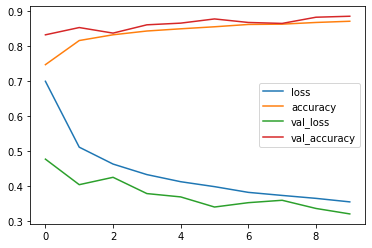

In [58]:
losses.plot()

In [59]:

# |   0   | T-shirt/top |
# |   1   | Trouser     |
# |   2   | Pullover    |
# |   3   | Dress       |
# |   4   | Coat        |
# |   5   | Sandal      |
# |   6   | Shirt       |
# |   7   | Sneaker     |
# |   8   | Bag         |
# |   9   | Ankle boot  |


def get_label(input_class):
    number = int(input_class)
    if number == 0:
        return 'Tshirt'
    
    elif number == 1:
        return "Trouser"
    
    elif number == 2:
        return "Pullover"
    
    elif number == 3:
        return "Dress"
    
    elif number == 4:
        return "Coat"
    
    elif number == 5:
        return "Sandal"
    
    elif number==6:
        return "Shirt"

    elif number == 7:
        return "Sneaker"
    elif number == 8:
        return "Bag"
    elif number == 9:
        return "Ankle Boot"
    
    

In [60]:
import cv2

In [64]:
def draw_test(name,pred,actual,input_im):
    BLACK = [0,0,0]
    
    res = get_label(pred)
    actual = get_label(actual)
    
    expanded_image = cv2.copyMakeBorder(input_im,0,0,0,4*imageL.shape[0],cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
    
    cv2.putText(expanded_image, "Predicted - "+ str(res),(152,70),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0))
    cv2.putText(expanded_image, "Actual - "+ str(actual),(152,90),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,0))
    
    cv2.imshow(name,expanded_image)
    

    
    

In [68]:
Display =1

for i in range(0,10):
    rand = np.random.randint(0,len(x_test)+1)
    
    input_im = x_test[rand]
    actual = y_test[rand].argmax(axis=0)
    imageL = cv2.resize(input_im,None,fx=4,fy=4,interpolation=cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)
    
    
    #GET PREDICTION
    
    res = str(model.predict_classes(input_im,1,verbose=0)[0])
    
    if Display:
        draw_test("Prediction",res,actual,imageL)
        cv2.waitKey(0)
        
    
cv2.destroyAllWindows()
    
    

In [69]:
model.save('fashion_mnist_27_OCT_2020.h5')

In [70]:
from keras.models import load_model